Presentado por: Mercy Arrobo - Solano Wilmer

Fecha: 13/08/2022

# Importación de librerias necesarias

In [1]:
#Importación de librerías necesarias
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
#para la segunda parte
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
#AlexNet
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization

# Cargar el Dataset

In [12]:
"""Declarar y presentar la dirección donde se encuentran las imagenes"""
ruta_imagen = "./PROYECTOIA-U3"
nombre_clases = os.listdir(ruta_imagen )
nombre_clases.sort()
"""Presentando etiquetas"""
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


# Explique el problema a resolver

Se desea desarrollar un modelo de IA basado en AlexNet, con el fin de identificar a un usuario usando un dataset de imagenes. Los usuarios serán los compañeros de clase, para este caso solo se va a trabajar con 5 de ellos. Con el respectivo procesamiento, el modelo deberá predecir con una imágen a qué compañero se hace referencia. 

# Características del dataset

El dataset que se encuentra en el directorio mencionado se encuentran carpetas de cada estudiante en la cual contiene sus fotos. Las características que se pueden identificar al dataset son:

NombreDelEstudiante= Se refiere al nombre de la carpeta donde se encuentran las imagenes de cada estudiantes.

Foto: Las 3 fotos de cada compañero por carpeta

Número total de fotos inicial: 15

# Procesamiento de imagenes

In [13]:
"""Ciclo for para reocrren el nombre de las etiquetas"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    elements = os.listdir(cur_path)
    """Copiando las imágenes en una nueva carpeta"""
    for element in elements:
        print("Copiando imagen - {} in PROYECTOIA-U3_Aumento/{}".format(element, nombre_clase))
        src = os.path.join(ruta_imagen  + "/" + nombre_clase, element) # origen
        dst = os.path.join("./PROYECTOIA-U3_Aumento/" + nombre_clase, element) 
        shutil.copy(src, dst)

Copiando imagen - L00385770_1.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_2.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00385770_3.png in PROYECTOIA-U3_Aumento/ArroboMercy
Copiando imagen - L00393007_1.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00393007_2.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00393007_3.png in PROYECTOIA-U3_Aumento/LeonardoBorja
Copiando imagen - L00080134_1.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00080134_2.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00080134_3.jpg in PROYECTOIA-U3_Aumento/PauteKevin
Copiando imagen - L00376689_1.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00376689_2.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00376689_3.png in PROYECTOIA-U3_Aumento/RivasSelena
Copiando imagen - L00392980_1.png in PROYECTOIA-U3_Aumento/Solano Wilmer
Copiando imagen - L00392980_2.png in PROYECTOIA-U3_Aumento/Solano Wilmer

# Evaluación del Modelo

In [14]:
"""Generando imagenes nuevas"""
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

# Arrobo Mercy

In [15]:
"""Creando imágenes para la carpeta de Mercy"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy', 
            save_format='png'):
        i += 1
        if i == 9:    
            break 

# Leonardo Borja

In [16]:
"""Creando imágenes para la carpeta de Borja"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\LeonardoBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",  
            save_prefix= 'LeonardoBorja', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# Paute Kevin

In [17]:
"""Creando imágenes para la carpeta de Paute"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\PauteKevin")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'PauteKevin', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# RivasSelena

In [18]:
"""Creando imágenes para la carpeta de Rivas"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'RivasSelena', 
            save_format='png'):
        i += 1
        if i == 9:     
            break 

# Solano Wilmer

In [19]:
"""Creando imágenes para la carpeta de Solano"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3\PROYECTOIA-U3_Aumento\Solano Wilmer")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".",   
            save_prefix= 'Solano Wilmer', 
            save_format='png'):
        i += 1
        if i == 9:     
            break

# Filtro NLM para eliminación de ruido de imágenes

In [20]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
os.chdir(r"C:\Users\wilme\Laboratorio1_U3")
ruta_imagen = "./PROYECTOIA-U3_Aumento"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


In [21]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imagen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # Imágenes de denoising
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        # mostrar actualización de bucle
        i += 1

Imagen de procesamiento - 1 in ArroboMercy
Imagen de procesamiento - 2 in ArroboMercy
Imagen de procesamiento - 3 in ArroboMercy
Imagen de procesamiento - 4 in ArroboMercy
Imagen de procesamiento - 5 in ArroboMercy
Imagen de procesamiento - 6 in ArroboMercy
Imagen de procesamiento - 7 in ArroboMercy
Imagen de procesamiento - 8 in ArroboMercy
Imagen de procesamiento - 9 in ArroboMercy
Imagen de procesamiento - 10 in ArroboMercy
Imagen de procesamiento - 11 in ArroboMercy
Imagen de procesamiento - 12 in ArroboMercy
Imagen de procesamiento - 13 in ArroboMercy
Imagen de procesamiento - 14 in ArroboMercy
Imagen de procesamiento - 15 in ArroboMercy
Imagen de procesamiento - 16 in ArroboMercy
Imagen de procesamiento - 17 in ArroboMercy
Imagen de procesamiento - 18 in ArroboMercy
Imagen de procesamiento - 19 in ArroboMercy
Imagen de procesamiento - 20 in ArroboMercy
Imagen de procesamiento - 21 in ArroboMercy
Imagen de procesamiento - 22 in ArroboMercy
Imagen de procesamiento - 23 in ArroboMer

# Eliminación de fondo

In [22]:
"""Obteniendo etiquetas de la nueva carpeta que se ha creado"""
ruta_imagen = "./PROYECTOIA-U3_eliminarRuido"
nombre_clases = os.listdir(ruta_imagen)
nombre_clases.sort()
print(nombre_clases)

['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer']


In [23]:
"""Recorriendo la ruta y el nombre de cada carpeta"""
for nombre_clase in nombre_clases:
    cur_path = ruta_imagen + "/" + nombre_clase
    cur_label = nombre_clase
    i = 1
    """Ciclo for para que se elimine el ruido de cada imágen"""
    for file in glob.glob(cur_path + "/*"):
        print("Imágen de procesamiento - {} in {}".format(i, cur_label))
        # leer la ruta de las imágenes
        image = cv2.imread(file)
        # removiendo bg 
        output = remove(image)
        # guardando imágenes
        save_path = './PROYECTOIA-U3_eliminarBG/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # mostrar actualización de bucle
        i += 1

Imágen de procesamiento - 1 in ArroboMercy
Imágen de procesamiento - 2 in ArroboMercy
Imágen de procesamiento - 3 in ArroboMercy
Imágen de procesamiento - 4 in ArroboMercy
Imágen de procesamiento - 5 in ArroboMercy
Imágen de procesamiento - 6 in ArroboMercy
Imágen de procesamiento - 7 in ArroboMercy
Imágen de procesamiento - 8 in ArroboMercy
Imágen de procesamiento - 9 in ArroboMercy
Imágen de procesamiento - 10 in ArroboMercy
Imágen de procesamiento - 11 in ArroboMercy
Imágen de procesamiento - 12 in ArroboMercy
Imágen de procesamiento - 13 in ArroboMercy
Imágen de procesamiento - 14 in ArroboMercy
Imágen de procesamiento - 15 in ArroboMercy
Imágen de procesamiento - 16 in ArroboMercy
Imágen de procesamiento - 17 in ArroboMercy
Imágen de procesamiento - 18 in ArroboMercy
Imágen de procesamiento - 19 in ArroboMercy
Imágen de procesamiento - 20 in ArroboMercy
Imágen de procesamiento - 21 in ArroboMercy
Imágen de procesamiento - 22 in ArroboMercy
Imágen de procesamiento - 23 in ArroboMer

# Carga y exploración de datos

In [24]:
"""Dirección de donde se encuentran las imágenes con las que se va a trabajar"""
fpath = './PROYECTOIA-U3_eliminarBG'
random_seed = 9
"""Imprimiendo el nombre de las categorías y el número"""
categories = os.listdir(fpath)
print("Listar las categorías = ",categories,"\n\nNúmero de categorías = ", len(categories))

Listar las categorías =  ['ArroboMercy', 'LeonardoBorja', 'PauteKevin', 'RivasSelena', 'Solano Wilmer'] 

Número de categorías =  5


In [25]:
"""Función para cargas las imágenes y etiquetas que recibe las categorías"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            """Características de las imágenes"""
            IMAGE_SIZE=(192,192)
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)
            
            """Creando array de imágenes"""
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
"""Presentando el número de etiquetas e imágenes que han sido cargadas"""
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

No. de imagenes cargadas =  150 
No. de etiquetas cargadas =  150
<class 'list'> <class 'list'>


In [26]:
"""Imagenes y etiquetas"""
images = np.array(images)
labels = np.array(labels)

print("Figura imagenes = ",images.shape,"\nFigura etiquetas = ",labels.shape)
print(type(images),type(labels))

Figura imagenes =  (150, 192, 192, 3) 
Figura etiquetas =  (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


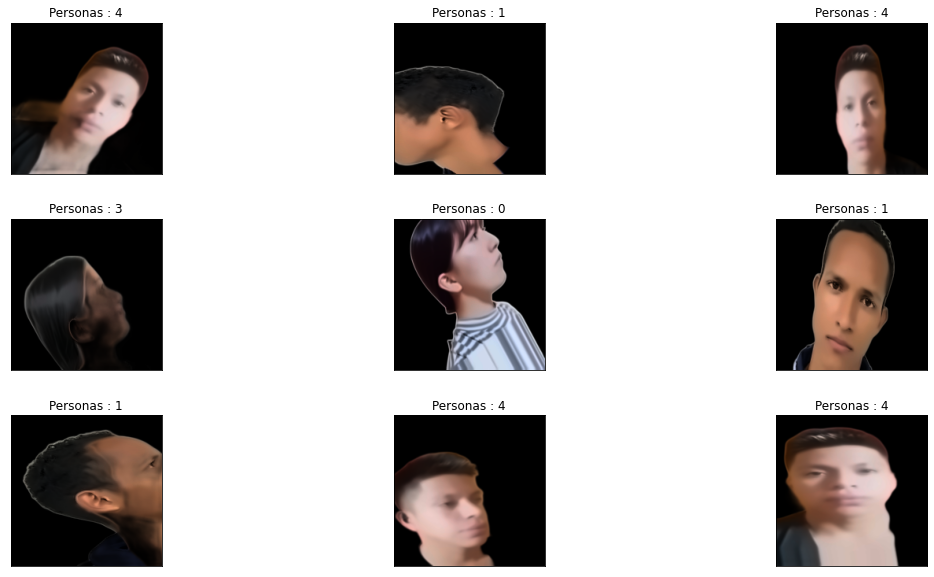

In [28]:
"""Función para mostrar imágenes aleatorias que recieben las etiquetas e imágenes"""
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Personas : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

# Preparar datos para entrenar el modelo CNN

In [30]:
#1-paso en el barajado de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' valores antes de barajar = ",n)

#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' valores despues de barajar= ",n)

'n' valores antes de barajar =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]

'n' valores despues de barajar=  [135  90 145 147  60  37  26   3  75   9  25  73  98  94  39  81  31  55
 101  47  28  27 111  20 118  89  43 144   8 137 112 138  23  67  79  82
  76  45 109   7  17 100  86  44 103  68   6  69  35 130  70  51  10  53
 133 136 110 140  80  21 134  38   2  84 116  11  57  78 122  96  97  36
  32 148  88  14 107  83 106  95

In [31]:
#2-paso en el barajado de datos

#barajar las imágenes y los datos de las etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Forma de las imagenes despues de barajar = ",images.shape,"\nEtiquetas despues de barajar = ",labels.shape)

Forma de las imagenes despues de barajar =  (150, 192, 192, 3) 
Etiquetas despues de barajar =  (150,)


In [32]:
"""Forma de imágenes"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (150, 192, 192, 3)


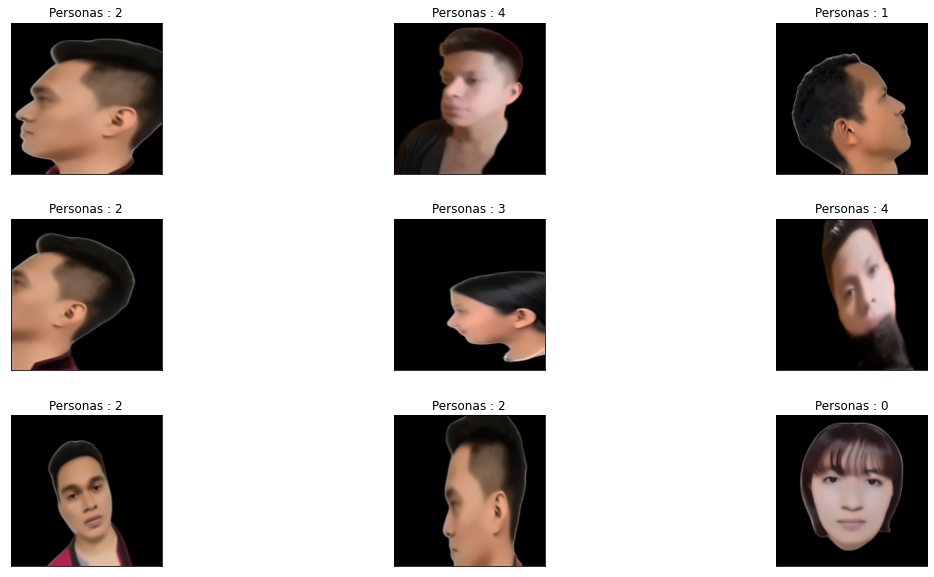

In [33]:
display_rand_images(images, labels)